In [51]:
import os
import numpy as np
from pathlib import Path
from gfos.data.utils import load_layout
from gfos.data.dataset import sample_configs


LAYOUT_DIR = r"H:\data\gfos\predict-ai-model-runtime\npz_all\npz\layout"
SOURCE = "xla"
SEARCH = "random"

In [52]:
files = load_layout(LAYOUT_DIR, model_type=SOURCE, compile_type=SEARCH)

In [53]:
train_val_file = files["train"] + files["valid"]

In [54]:
num_configs = [len(np.load(file)["config_runtime"]) for file in train_val_file]

In [55]:
max_configs = 9000
num_folds = 3
data_root = Path("../../data/indices")

data_root.mkdir(exist_ok=True)

In [56]:
for file in train_val_file:
    model_id = Path(file).stem
    npz = np.load(file)
    config_runtime = npz["config_runtime"]
    
    c = len(config_runtime)
    max_configs = min(max_configs, c) if max_configs > 0 else c
    third = max_configs // 3

    sorted_indices = np.argsort(config_runtime)

    for i in range(num_folds):
        keep_indices = np.concatenate(
            [
                sorted_indices[:third],  # Good configs.
                sorted_indices[-third:],  # Bad configs.
                np.random.choice(
                    sorted_indices[third:-third],
                    max_configs - 2 * third,
                ),
            ]
        )
        
        fold_dir = data_root / f"{SOURCE}_{SEARCH}" / f"{i}"
        fold_dir.mkdir(exist_ok=True, parents=True)
        np.save(fold_dir / f"{model_id}.npy", keep_indices)
        

In [45]:
model = "alexnet_train_batch_32"
indices_fold1 = np.load(data_root / f"{SOURCE}_{SEARCH}" / "0" / f"{model}.npy")
indices_fold2 = np.load(data_root / f"{SOURCE}_{SEARCH}" / "1" / f"{model}.npy")
indices_fold3 = np.load(data_root / f"{SOURCE}_{SEARCH}" / "2" / f"{model}.npy")


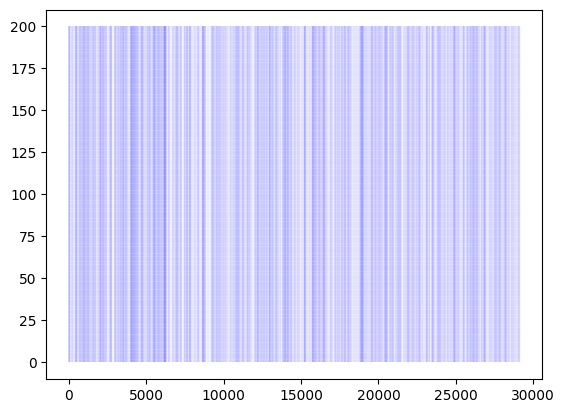

In [50]:
import matplotlib.pyplot as plt

# plt.vlines(indices_fold1, 0, 1, color="red")
# plt.vlines(indices_fold2, 0, 1, color="green")
plt.vlines(indices_fold3, 0, 200, color="blue", linestyles="dashed", linewidth=0.05)

In [14]:
dict(zip(train_val_file, num_configs))

{'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\alexnet_train_batch_32.npz': 29144,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_classifier.2x2.fp32.npz': 10760,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_classifier.2x2.fp32.performance.npz': 22944,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_pretraining.2x2.fp16.npz': 18776,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_pretraining.8x16.fp16.npz': 19128,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_pretraining.8x8.fp32.performance.npz': 18368,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\bert_squad.2x2.fp32.npz': 9760,
 'H:\\data\\gfos\\predict-ai-model-runtime\\npz_all\\npz\\layout\\xla\\random\\train\\brax_es.npz': 100040,
 'H: